# Importing Libraries

In [50]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# استثناء الميزة التي لا تريد تحويلها
features = [col for col in df_encoded.columns if col != 'is_prompted']

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature].values.reshape(-1, 1))  # تحويل البيانات إلى صيغة مناسبة للتقييس
    df_encoded[feature] = scaler.transform(df_encoded[feature].values.reshape(-1, 1))

df_encoded.head()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/employees-evaluation-for-promotion/employee_promotion.csv


# Reading File

In [51]:
df = pd.read_csv('/kaggle/input/employees-evaluation-for-promotion/employee_promotion.csv')

# Data Exploration

In [52]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [53]:
df.shape

(54808, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [55]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [56]:
df.describe(include='O')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [57]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

# Data Analysis

**- Correlation between numeric variables**

In [58]:
numeric = df.select_dtypes(exclude="object")
numeric.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

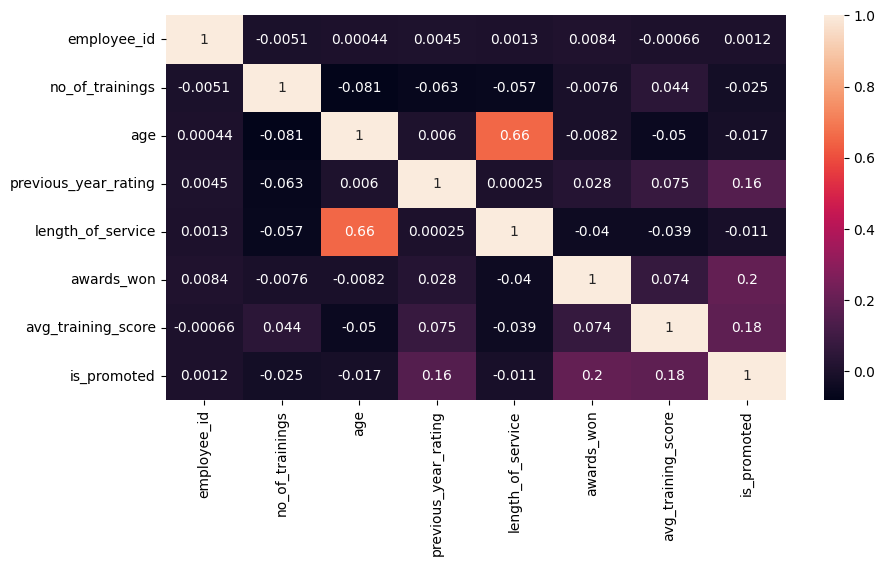

In [59]:
cor = numeric.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot = True)
plt.show()

*** Variables (previous year rating , awords won , avg training score) have the most correlation with promotion and this is expected**

**1) What are the departments in the company ?**

In [60]:
df['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

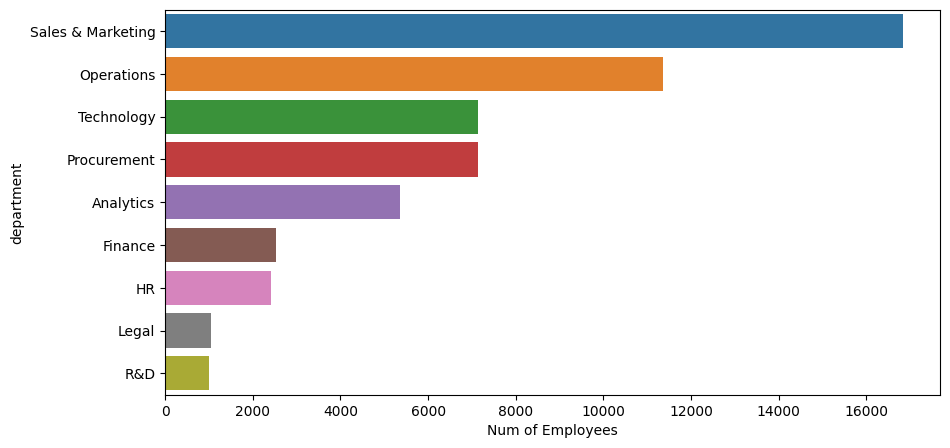

In [61]:
plt.figure(figsize=(10,5))
plt.xlabel('Num of Employees')
plt.ylabel('Department')
sns.barplot(x=df['department'].value_counts().values,
            y=df['department'].value_counts().index)
plt.show()

**2) What are the regions in the company ?**

In [62]:
top10regions = df['region'].value_counts().nlargest(n=10)
top10regions
#Because they are many, i took top 10 only

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
Name: count, dtype: int64

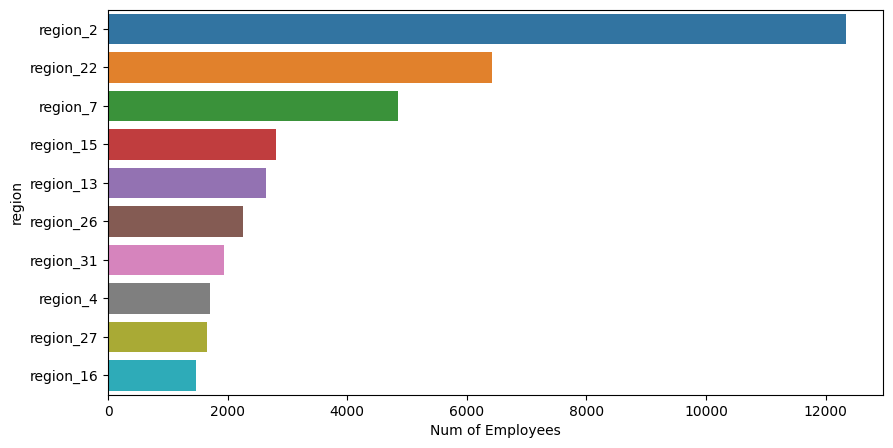

In [63]:
plt.figure(figsize=(10,5))
plt.xlabel('Num of Employees')
plt.ylabel('region')
sns.barplot(x=df['region'].value_counts().nlargest(n=10).values,
            y=df['region'].value_counts().nlargest(n=10).index)
plt.show()


**3) Education Level in the company**

In [64]:
df['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

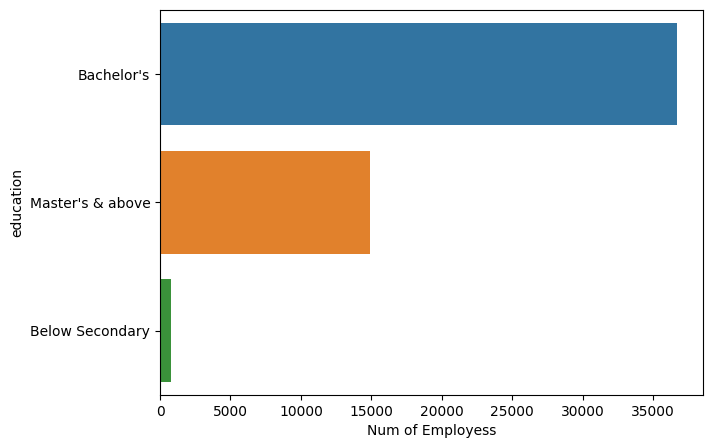

In [65]:
plt.figure(figsize=(7,5))
plt.xlabel('Num of Employess')
plt.ylabel('Education Level')
sns.barplot(x=df['education'].value_counts().values,
            y=df['education'].value_counts().index)
plt.show()

**4) Gender Distribuation in the company**

In [66]:
df['gender'].value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

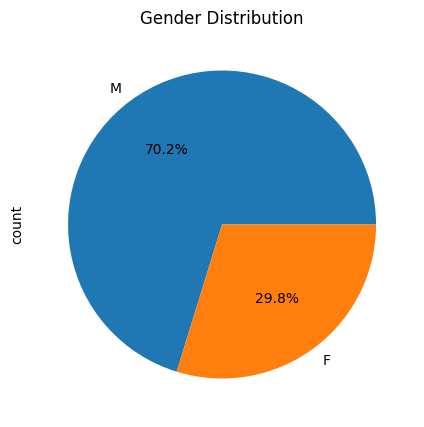

In [67]:
plt.figure(figsize=(5, 5))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', labels=['M', 'F'])
plt.title('Gender Distribution')
plt.show()

**5) Promoted Employees**

In [68]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

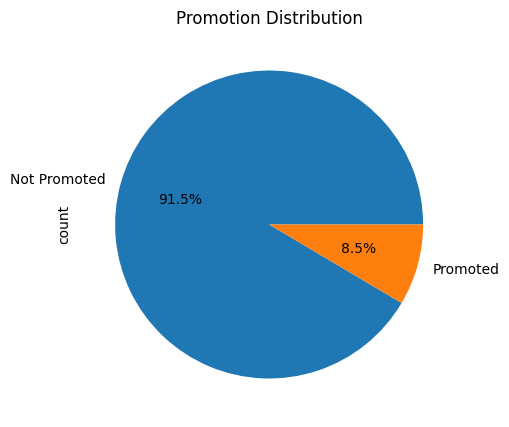

In [69]:
plt.figure(figsize=(5, 5))
df['is_promoted'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Promoted', 'Promoted'])
plt.title('Promotion Distribution')
plt.show()

**6) Recruitment Channel**

In [70]:
df['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

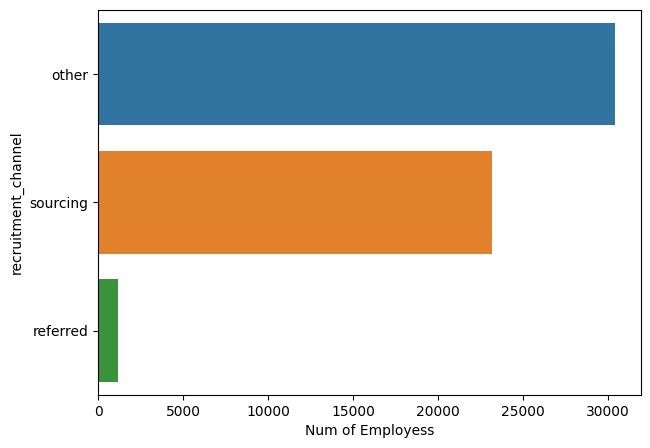

In [71]:
plt.figure(figsize=(7,5))
plt.xlabel('Num of Employess')
plt.ylabel('Recruitment Channel')
sns.barplot(x=df['recruitment_channel'].value_counts().values,
            y=df['recruitment_channel'].value_counts().index)
plt.show()

**7) Education Level in each Department**

In [72]:
df.groupby(['department', 'education']).count().reset_index()


,department,education,employee_id,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Analytics,Bachelor's,3978,3978,3978,3978,3978,3978,3589,3978,3978,3978,3978
1,Analytics,Master's & above,1037,1037,1037,1037,1037,1037,1021,1037,1037,1037,1037
2,Finance,Bachelor's,1895,1895,1895,1895,1895,1895,1658,1895,1895,1667,1895
3,Finance,Below Secondary,106,106,106,106,106,106,66,106,106,84,106
4,Finance,Master's & above,499,499,499,499,499,499,495,499,499,439,499
5,HR,Bachelor's,1525,1525,1525,1525,1525,1525,1343,1525,1525,1470,1525
6,HR,Below Secondary,128,128,128,128,128,128,68,128,128,124,128
7,HR,Master's & above,733,733,733,733,733,733,731,733,733,705,733
8,Legal,Bachelor's,814,814,814,814,814,814,671,814,814,715,814
9,Legal,Below Secondary,65,65,65,65,65,65,40,65,65,53,65


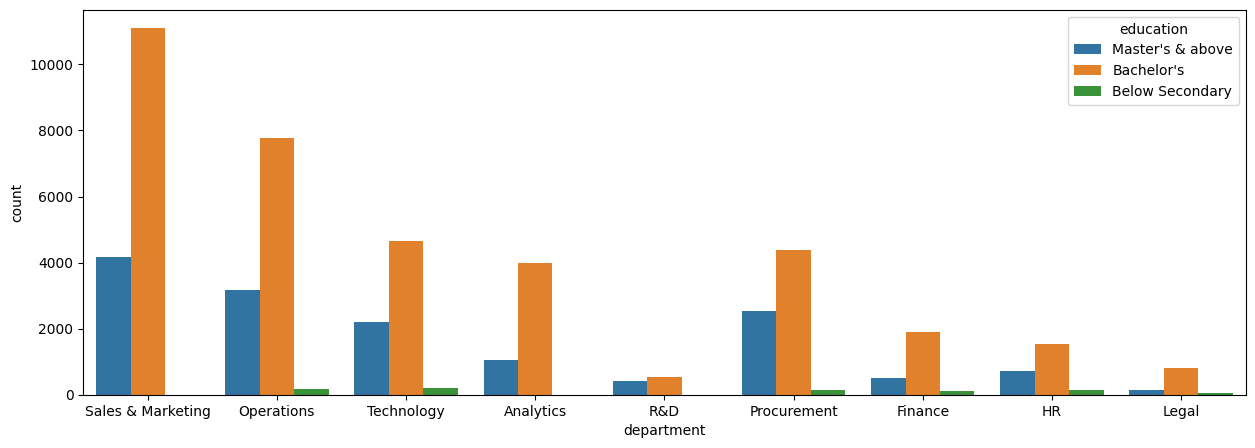

In [73]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df["department"],hue=df["education"])
plt.show()

*** From the figure and the table above, we notice that (Sales & Markting , R&D , Analytics) departments dont include an educational level lower than a bachelor's degree**

***In the R&D administration, those with postgraduate studies are close to those with bachelor’s degrees, and at the same time there are no less than bachelor’s degrees, They seem to focus on higher education.**

**8) Gender Dist in each Department**

In [74]:
df.groupby(['department', 'gender']).size().reset_index(name='count')


,department,gender,count
0,Analytics,f,513
1,Analytics,m,4839
2,Finance,f,681
3,Finance,m,1855
4,HR,f,1006
5,HR,m,1412
6,Legal,f,149
7,Legal,m,890
8,Operations,f,4677
9,Operations,m,6671


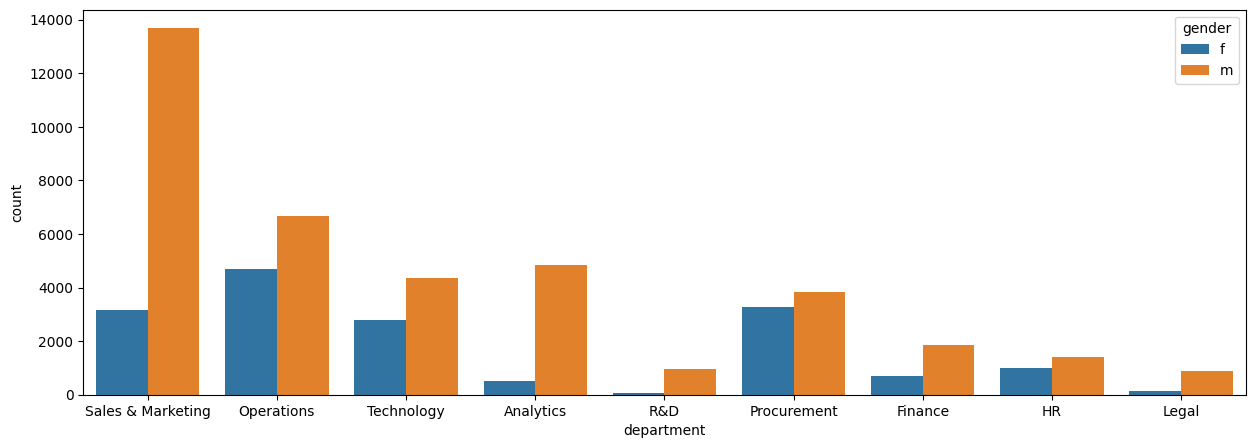

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df["department"],hue=df["gender"])
plt.show()

***Anyways, males are more than females in all departments, but the majority percentage varies from one department to another**

**9) Promotion in each Department**

In [76]:
df.groupby(['department', 'is_promoted']).size().reset_index(name='count')


,department,is_promoted,count
0,Analytics,0,4840
1,Analytics,1,512
2,Finance,0,2330
3,Finance,1,206
4,HR,0,2282
5,HR,1,136
6,Legal,0,986
7,Legal,1,53
8,Operations,0,10325
9,Operations,1,1023


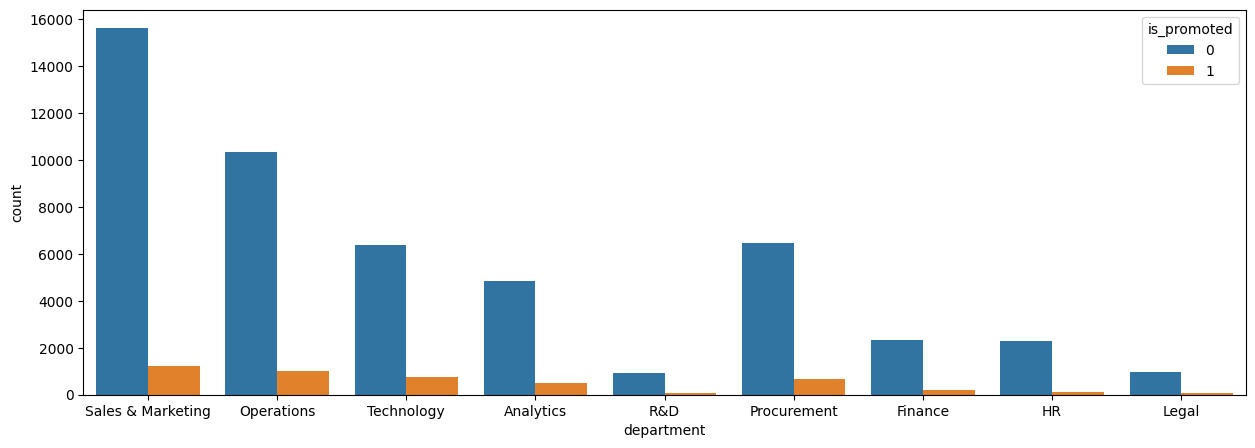

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df["department"],hue=df["is_promoted"])
plt.show()

***We notice that the majority percentage for not being promoted is close in almost all departments**

**10) Gender Dist in each Education level**

In [78]:
df.groupby(['education', 'gender']).size().reset_index(name='count')


,education,gender,count
0,Bachelor's,f,10854
1,Bachelor's,m,25815
2,Below Secondary,f,289
3,Below Secondary,m,516
4,Master's & above,f,4778
5,Master's & above,m,10147


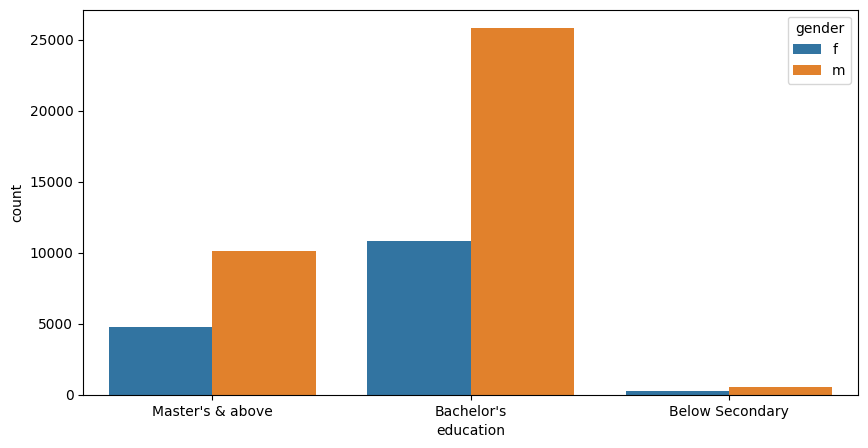

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x=df["education"],hue=df["gender"])
plt.show()

**11) Promotion status in each Education level**

In [80]:
df.groupby(['education', 'is_promoted']).size().reset_index(name='count')

,education,is_promoted,count
0,Bachelor's,0,33661
1,Bachelor's,1,3008
2,Below Secondary,0,738
3,Below Secondary,1,67
4,Master's & above,0,13454
5,Master's & above,1,1471


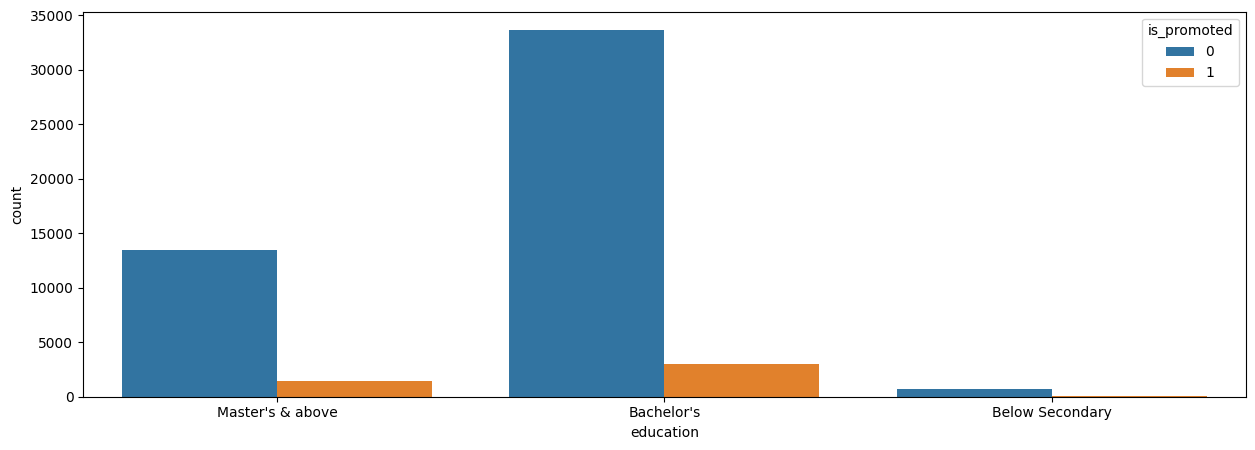

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df["education"],hue=df["is_promoted"])
plt.show()

***Maybe your higher education won't make your manager promote you**

**12) Avg Age in each Department**

In [82]:
df.groupby('department')['age'].mean().reset_index(name='average_age').round(2)

,department,average_age
0,Analytics,32.43
1,Finance,32.06
2,HR,34.39
3,Legal,33.83
4,Operations,36.07
5,Procurement,35.90
6,R&D,32.84
7,Sales & Marketing,34.86
8,Technology,34.87


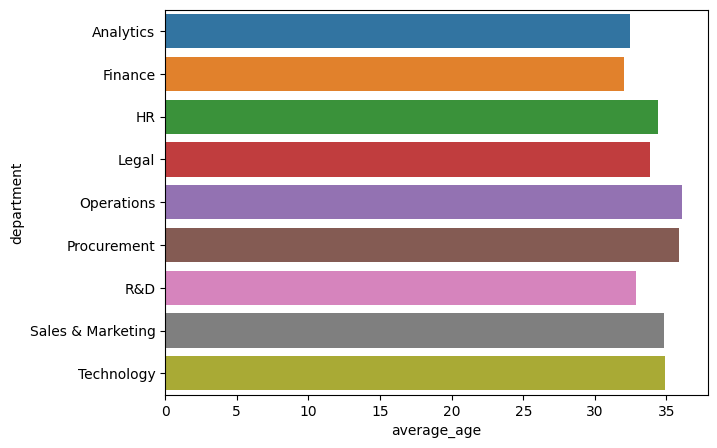

In [83]:
plt.figure(figsize=(7, 5))
plt.xlabel('Average Age')
plt.ylabel('Department')
sns.barplot(x='average_age', y='department', data=df.groupby('department')['age'].mean().reset_index(name='average_age').round(2))
plt.show()

**13) Avg Age in each Education level**

In [84]:
df.groupby('education')['age'].mean().reset_index(name='average_age').round(2)

,education,average_age
0,Bachelor's,33.45
1,Below Secondary,23.84
2,Master's & above,39.35


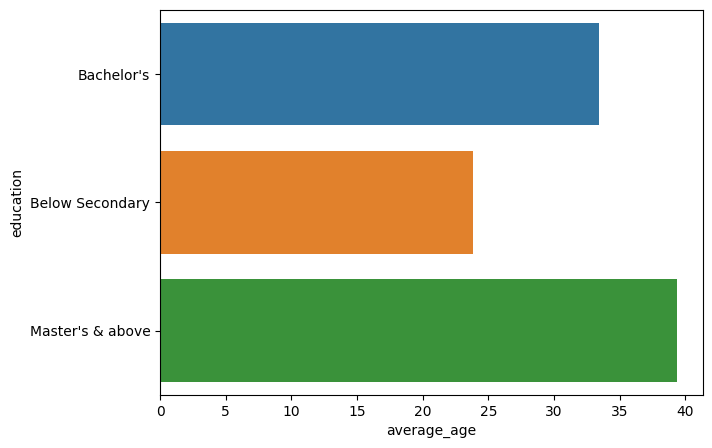

In [85]:
plt.figure(figsize=(7, 5))
plt.xlabel('Average Age')
plt.ylabel('Education Level')
sns.barplot(x='average_age', y='education', data=df.groupby('education')['age'].mean().reset_index(name='average_age').round(2))
plt.show()

**14) Avg Age in each Gender Dist**

In [86]:
df.groupby('gender')['age'].mean().reset_index(name='average_age').round(2)

,gender,average_age
0,f,35.00
1,m,34.72


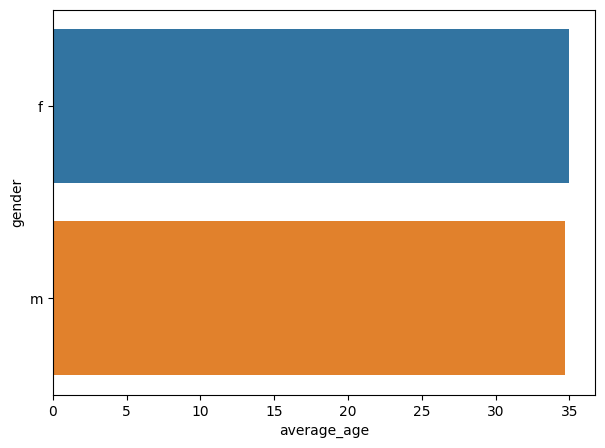

In [87]:
plt.figure(figsize=(7, 5))
plt.xlabel('Average Age')
sns.barplot(x='average_age', y='gender', data=df.groupby('gender')['age'].mean().reset_index(name='average_age').round(2))
plt.show()


**15) Avg Age in each Promotion Status**

In [88]:
df.groupby('is_promoted')['age'].mean().reset_index(name='average_age').round(2)

,is_promoted,average_age
0,0,34.84
1,1,34.37


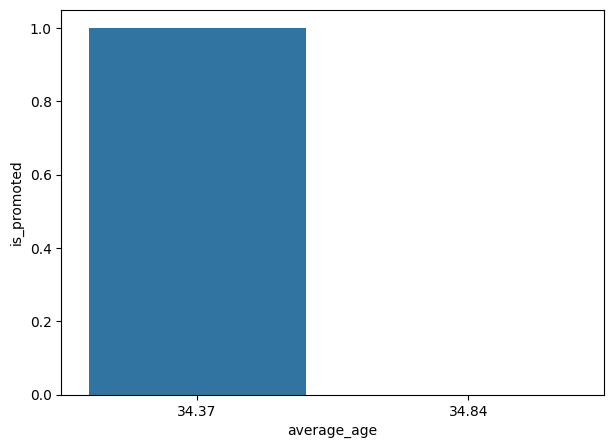

In [89]:
plt.figure(figsize=(7, 5))
plt.xlabel('Average Age')
sns.barplot(x='average_age', y='is_promoted', data=df.groupby('is_promoted')['age'].mean().reset_index(name='average_age').round(2))
plt.show()


***We previously calculated the standard deviation for Age= 7.6 (low) and the previous figures prove this**

In [90]:
# def Analysis(var,df):
#     df[var].value_counts()
#     plt.figure(figsize=(7,5))
#     plt.xlabel('Num of Employess')
#     plt.ylabel('Count')
#     sns.barplot(x=df[var].value_counts().values, y=df[var].value_counts().index)
#     plt.show()
    
# Analysis(var='education',df=df)

In [91]:
# def Analysis2(var1,var2,df):
#     df.groupby([var1, var2]).size().reset_index(name='count')
#     plt.figure(figsize=(15,5))
#     sns.countplot(data=df,x=df[var1],hue=df[var2])
#     plt.show()
    
# Analysis2(var1='education',var2='is_promoted',df=df)

In [92]:
# def Analysis3(var1,var2,df=df):
#     df.groupby(var1)[var2].mean().reset_index(name='average_age').round(2)
#     plt.figure(figsize=(7, 5))
#     plt.xlabel('Average Age')
#     sns.barplot(x='average_age', y=var1, data=df.groupby(var1)[var2].mean().reset_index(name='average_age').round(2))
#     plt.show()
    
# Analysis3(var1='department',var2='age',df=df)

***Instead of the many steps we did, we can use one of these functions**

# Data Pre-processing

**- Cleaning nulls**

In [93]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [94]:
df['education'] = df['education'].fillna(df['education'].mode)
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median)
df['avg_training_score'] = df['avg_training_score'].fillna(df['avg_training_score'].median)


In [95]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

**- Converting To Numeric**

In [96]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,employee_id,no_of_trainings,age,length_of_service,awards_won,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,...,avg_training_score_66.0,avg_training_score_95.0,avg_training_score_42.0,avg_training_score_96.0,avg_training_score_40.0,avg_training_score_99.0,avg_training_score_43.0,avg_training_score_97.0,avg_training_score_41.0,avg_training_score_98.0
0,65438,1,35,8,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,65141,1,30,4,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7513,1,34,7,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2542,2,39,10,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,48945,1,45,2,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**- Data Scaling**

In [97]:

features = [col for col in df_encoded.columns if col != 'is_promoted']

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature].values.reshape(-1, 1))
    df_encoded[feature] = scaler.transform(df_encoded[feature].values.reshape(-1, 1))

df_encoded.head()


,employee_id,no_of_trainings,age,length_of_service,awards_won,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,...,avg_training_score_66.0,avg_training_score_95.0,avg_training_score_42.0,avg_training_score_96.0,avg_training_score_40.0,avg_training_score_99.0,avg_training_score_43.0,avg_training_score_97.0,avg_training_score_41.0,avg_training_score_98.0
0,1.161858,-0.415276,0.025598,0.500460,-0.154018,0,-0.328964,-0.220262,-0.214834,-0.139009,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
1,1.148709,-0.415276,-0.627135,-0.437395,-0.154018,0,-0.328964,-0.220262,-0.214834,-0.139009,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
2,-1.402741,-0.415276,-0.104948,0.265996,-0.154018,0,-0.328964,-0.220262,-0.214834,-0.139009,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
3,-1.622829,1.226063,0.547785,0.969387,-0.154018,0,-0.328964,-0.220262,-0.214834,-0.139009,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991
4,0.431639,-0.415276,1.331064,-0.906322,-0.154018,0,-0.328964,-0.220262,-0.214834,-0.139009,...,-0.103419,-0.028666,-0.033653,-0.029607,-0.009552,-0.025278,-0.056759,-0.029914,-0.021786,-0.025991


# Model Bulding

In [98]:
x = df_encoded.drop(columns=['is_promoted','employee_id'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40,shuffle=True)

In [100]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [101]:
model1 = LogisticRegression()
model2= GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = DecisionTreeClassifier(max_depth=12)

In [102]:
def predicting(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

In [103]:
predicting(model1)

Accuracy: 0.9414340448823207
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10081
           1       0.89      0.31      0.46       881

    accuracy                           0.94     10962
   macro avg       0.92      0.65      0.71     10962
weighted avg       0.94      0.94      0.93     10962



In [104]:
predicting(model2)

Accuracy: 0.9288451012588944
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     10081
           1       0.84      0.14      0.24       881

    accuracy                           0.93     10962
   macro avg       0.89      0.57      0.60     10962
weighted avg       0.92      0.93      0.90     10962



In [105]:
predicting(model3)

Accuracy: 0.9307608100711549
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10081
           1       0.76      0.20      0.32       881

    accuracy                           0.93     10962
   macro avg       0.85      0.60      0.64     10962
weighted avg       0.92      0.93      0.91     10962



In [106]:
predicting(model4)

Accuracy: 0.9271118409049444
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     10081
           1       0.80      0.12      0.22       881

    accuracy                           0.93     10962
   macro avg       0.86      0.56      0.59     10962
weighted avg       0.92      0.93      0.90     10962



***So best model is (Logistic Regression)**

# **Thank You**